### Discussion Questions
1. what is irreducible error?
2. What is variance?
3. How could we use aggregation to reduce the effect of variance?
4. How does variance differ to bias?
5. How can holdout sets help us detect variance?
6. What is R squared?  Feel free to use wikipedia to answer.


In [1]:
import numpy as np

In [4]:
temperatures = np.random.randint(0, 105, 150)

In [5]:
temperatures[0:3]

array([78, 84, 91])

$ y = 5*temperature + 40*1 + \epsilon_i$

In [8]:
params = np.array([5, 40])

In [11]:
ones = np.ones(150)

In [17]:
features_matrix = np.hstack((temperatures.reshape(-1, 1), ones.reshape(-1, 1)))

In [18]:
features_matrix.shape

(150, 2)

In [23]:
features_matrix[:3, :]

array([[78.,  1.],
       [84.,  1.],
       [91.,  1.]])

In [22]:
params

array([ 5, 40])

In [25]:
customers = features_matrix@params

In [29]:
noisy_customers = customers + errors

In [26]:
from graph import trace_values, plot

In [31]:
errors = np.random.randint(-30, 30, 150)
errors

array([-24,  25,  17,  10,  16,   0, -18,  17,   7,   9, -29,  15,  26,
       -19,  16,  29,   8,  11, -11,  27, -25, -19, -20,  18,   4,  21,
       -30,   7, -13, -17,  15,   9,   7,   5, -25, -28,  28,   4,  24,
         3,   8,   8, -22,  23, -22,  27, -14, -18,  20, -12,  15,  -6,
         5, -30, -10,  20, -17,  -4, -11, -22,  27,  -6, -22,   2,  -4,
       -29,   4,   9,  13,  -4, -11, -30,  16, -30,  19,  -6,  -1, -25,
       -21, -29,  10, -24,  19,  -2, -18,  28, -23, -11, -28,  17, -15,
         6, -26,  24,   3, -27,   6,  20, -24,  11,   4,  20,  23,  -3,
        -7,  28, -12,   6, -16,   7,   2,   2, -18,   7, -12, -24,  -8,
       -21, -26, -21,   2,   4,  29, -17, -28,  -6, -14,  -4,  -4, -25,
        23, -20, -20, -18,  -3,  14,  15, -27, -19,  18,  -4,  22, -17,
       -17,  10, -15,   0, -28,  28,  11])

$ y = 5*temperature + 40*1 + \epsilon_i$

In [ ]:
model.predict()

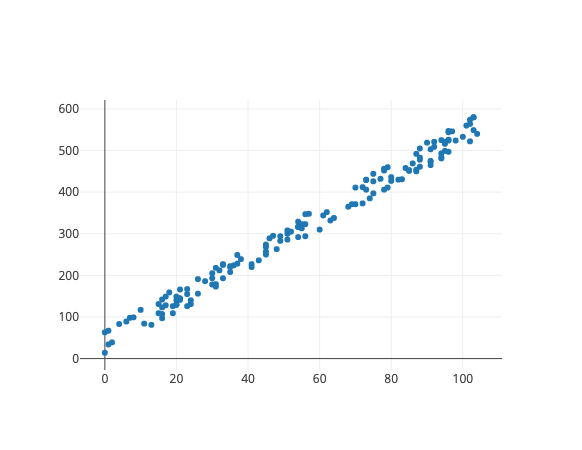

In [41]:

trace = trace_values(temperatures, noisy_customers)
plot([trace])

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression(fit_intercept = False)

In [36]:
model.fit(features_matrix, customers)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [37]:
model.coef_

array([ 5., 40.])

In [ ]:
model.predict()

In [38]:
variance_model = LinearRegression(fit_intercept=False)
variance_model.fit(features_matrix, noisy_customers)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [40]:
variance_model.coef_

array([ 4.96420806, 42.09098646])

In [44]:
updated_errors = np.random.randint(-30, 30, 150)
updated_customers = customers + updated_errors

In [45]:
updated_variance_model = LinearRegression(fit_intercept=False)

In [46]:
updated_variance_model.fit(features_matrix, updated_customers)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [47]:
updated_variance_model.coef_

array([ 5.00211892, 38.00879809])

In [63]:
models = []
for idx in range(0, 10000):
    updated_errors = np.random.randint(-30, 30, 150)
    new_customers = customers + updated_errors
    model = LinearRegression(fit_intercept=False)
    model.fit(features_matrix, new_customers)
    models.append(model)

In [64]:
coefs = np.array([model.coef_ for model in models])

In [65]:
np.average(coefs[:, 0])

4.999399436326282

$\frac{1}{n} \sum (\theta - \hat \theta_i) = 0$ 